In [ ]:
#Component 2 

In [ ]:
#2.1 Load and Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("D:\\Upgrad\\Mentorship\\uber.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
#drop Unknow Column
df=df.drop(columns=["Unnamed: 0"])

In [6]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
#Converting datatype of Date and time column since its on object format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [9]:
#Remove rows having 0 value in geo cordinates columns since these values are of no use.
df_Filtered = df[(df['pickup_latitude'] != 0) &
                                        (df['pickup_longitude'] != 0) &
                                        (df['dropoff_latitude'] != 0) &
                                        (df['dropoff_longitude'] != 0)]

In [10]:
# Further filter out rows where passenger_count is zero or extremely high
passenger_count_min, passenger_count_max = 1, 6  # Assuming typical passenger count ranges from 1 to 6
df_Filtered1 = df_Filtered[(df_Filtered['passenger_count'] >= passenger_count_min) &
                                  (df_Filtered['passenger_count'] <= passenger_count_max)]

In [11]:
df_Filtered1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195344.000000,195344.000000,195344.000000,195344.000000,195344.000000,195344.000000
mean,11.350020,-73.929891,40.705429,-73.916905,40.688366,1.690090
std,9.808273,5.458941,5.436378,8.533175,4.001281,1.306077
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992268,40.736393,-73.991593,40.735267,1.000000
50%,8.500000,-73.982102,40.753279,-73.980523,40.753724,1.000000
75%,12.500000,-73.968317,40.767540,-73.965317,40.768321,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


In [12]:
#Remove outliers based on realistic bounds for latitude and longitude
lat_min, lat_max = -90, 90
long_min, long_max = -180, 180
df_Cleaned = df_Filtered1[(df_Filtered1['pickup_latitude'].between(lat_min, lat_max)) &
                                       (df_Filtered1['pickup_longitude'].between(long_min, long_max)) &
                                       (df_Filtered1['dropoff_latitude'].between(lat_min, lat_max)) &
                                       (df_Filtered1['dropoff_longitude'].between(long_min, long_max))]

In [13]:
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195332 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                195332 non-null  object             
 1   fare_amount        195332 non-null  float64            
 2   pickup_datetime    195332 non-null  datetime64[ns, UTC]
 3   pickup_longitude   195332 non-null  float64            
 4   pickup_latitude    195332 non-null  float64            
 5   dropoff_longitude  195332 non-null  float64            
 6   dropoff_latitude   195332 non-null  float64            
 7   passenger_count    195332 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.4+ MB


In [14]:
df_Cleaned = df_Cleaned[df_Cleaned['fare_amount'] > 0]

In [15]:
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195313 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                195313 non-null  object             
 1   fare_amount        195313 non-null  float64            
 2   pickup_datetime    195313 non-null  datetime64[ns, UTC]
 3   pickup_longitude   195313 non-null  float64            
 4   pickup_latitude    195313 non-null  float64            
 5   dropoff_longitude  195313 non-null  float64            
 6   dropoff_latitude   195313 non-null  float64            
 7   passenger_count    195313 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.4+ MB


In [16]:
# Create separate columns for date and time
df_Cleaned['pickup_date'] = df_Cleaned['pickup_datetime'].dt.date
df_Cleaned['pickup_time'] = df_Cleaned['pickup_datetime'].dt.time

In [17]:
df_Cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


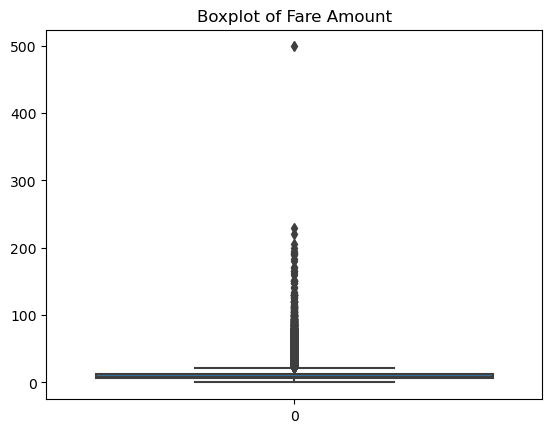

In [18]:
import seaborn as sns
# Visualizing the distribution of fare_amount
sns.boxplot(df_Cleaned['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

In [19]:
# Removing outliers based on fare amount
# Assuming a typical fare should be between $2.5 and $300
df_Cleaned = df_Cleaned[(df_Cleaned['fare_amount'] >= 2.5) & (df_Cleaned['fare_amount'] <= 300)]

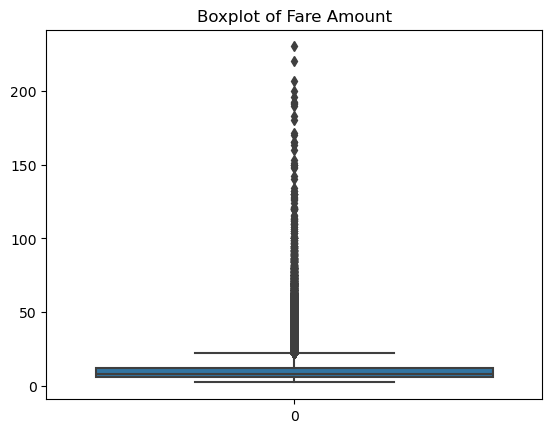

In [20]:
import seaborn as sns
# Visualizing the distribution of fare_amount
sns.boxplot(df_Cleaned['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

In [21]:
# As per the above boxplot graph its seems that the mean value lies between 2.5 and 5 

In [22]:
df_Cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


In [23]:
# Create a new column 'day_or_night'
# Extract hour from pickup_time
df_Cleaned['hour'] = df_Cleaned['pickup_time'].apply(lambda x: x.hour)
# Create 'day_or_night' column
def categorize_time(hour):
    if 6 <= hour < 18:
        return 'day'
    else:
        return 'night'

df_Cleaned['day_or_night'] = df_Cleaned['hour'].apply(categorize_time)

# Display the first few rows to verify
print(df_Cleaned[['pickup_time', 'hour', 'day_or_night']].head())

  pickup_time  hour day_or_night
0    19:52:06    19        night
1    20:04:56    20        night
2    21:45:00    21        night
3    08:22:21     8          day
4    17:47:00    17          day


In [24]:
# Haversine formula to calculate distance between two points in kilometers
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [25]:
# Calculate distance for each row
df_Cleaned['distance'] = df_Cleaned.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Display the first few rows to verify
print(df_Cleaned[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance']].head())

   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.738354        -73.999817         40.723217         -73.999512   
1        40.728225        -73.994355         40.750325         -73.994710   
2        40.740770        -74.005043         40.772647         -73.962565   
3        40.790844        -73.976124         40.803349         -73.965316   
4        40.744085        -73.925023         40.761247         -73.973082   

   distance  
0  1.683323  
1  2.457590  
2  5.036377  
3  1.661683  
4  4.475450  


In [26]:
df_Cleaned = df_Cleaned[df_Cleaned['distance'] > 0]

In [27]:
# Extract the day of the week (e.g., Monday, Tuesday)
df_Cleaned['pickup_date'] = pd.to_datetime(df_Cleaned['pickup_date'], errors='coerce')

# Ensure that the column is in datetime format
print(df_Cleaned['pickup_date'].dtype)  # Should show 'datetime64[ns]'

# Extract the day of the week (e.g., Monday, Tuesday)
df_Cleaned['day_of_week'] = df_Cleaned['pickup_date'].dt.day_name()
df_Cleaned.head()

datetime64[ns]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day_or_night,distance,day_of_week
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,night,1.683323,Thursday
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,night,2.457590,Friday
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,night,5.036377,Monday
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,day,1.661683,Friday
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,day,4.475450,Thursday


In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [29]:
sns.set(style="whitegrid")

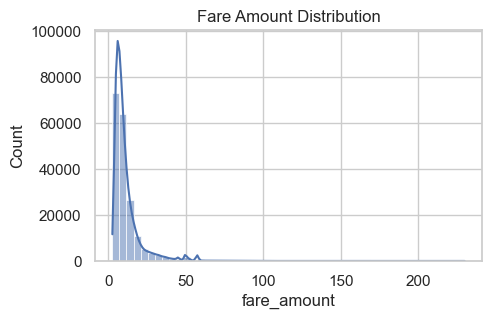

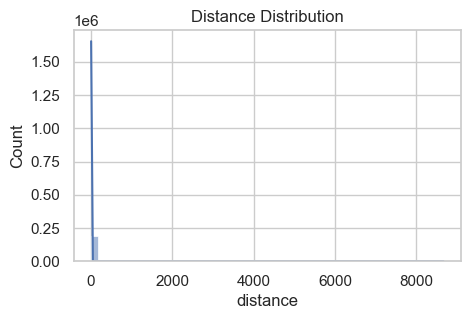

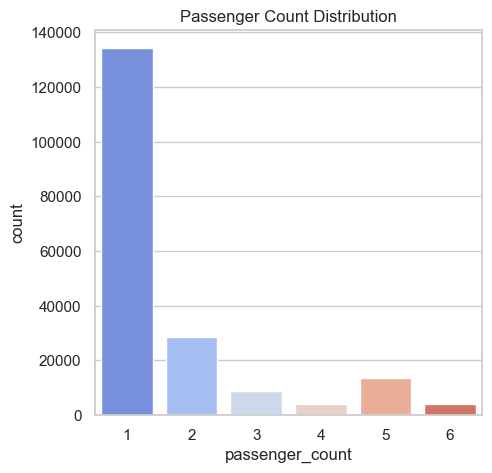

In [30]:
# 1. Fare Amount Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.show()
# 2. Distance Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned['distance'], bins=50, kde=True)
plt.title('Distance Distribution')
plt.show()
# 3. Passenger Count Distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='passenger_count', data=df_Cleaned, palette='coolwarm')
plt.title('Passenger Count Distribution')
plt.show()

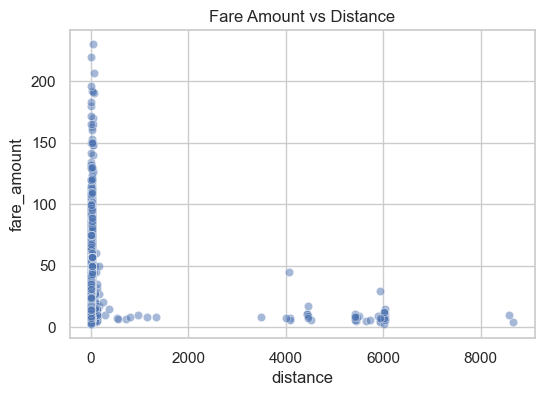

In [31]:
# 4. Fare Amount vs Distance
plt.figure(figsize=(6, 4))
sns.scatterplot(x='distance', y='fare_amount', data=df_Cleaned, alpha=0.5)
plt.title('Fare Amount vs Distance')
plt.show()

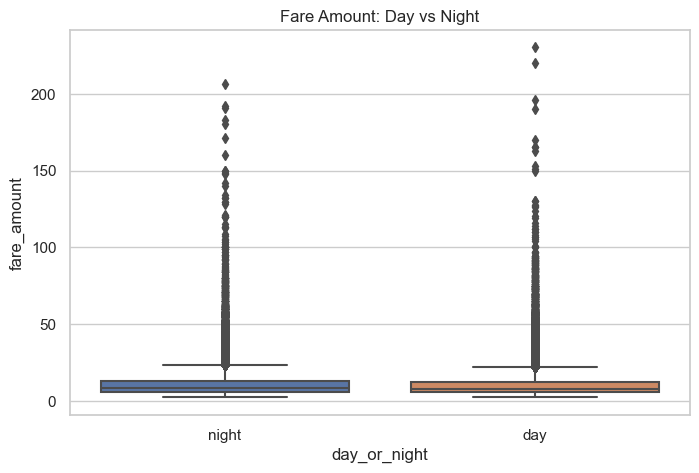

In [32]:
# 5. Day or Night Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_or_night', y='fare_amount', data=df_Cleaned)
plt.title('Fare Amount: Day vs Night')
plt.show()

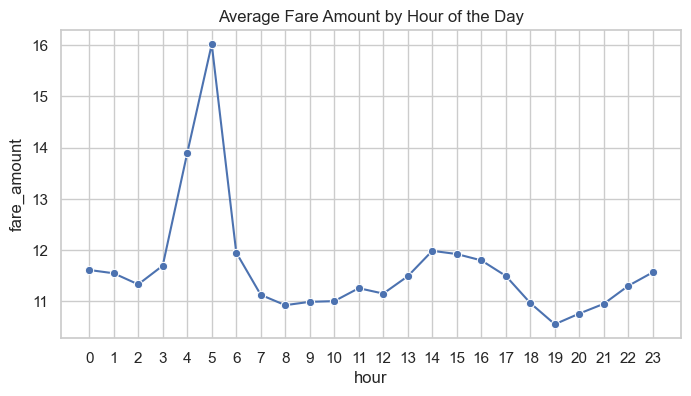

In [33]:
# 6. Line Plot for Fare Amount by Pickup Hour ----
plt.figure(figsize=(8, 4))
sns.lineplot(x='hour', y='fare_amount', data=df_Cleaned, ci=None, marker='o')
plt.title('Average Fare Amount by Hour of the Day')
plt.xticks(range(0, 24))
plt.show()

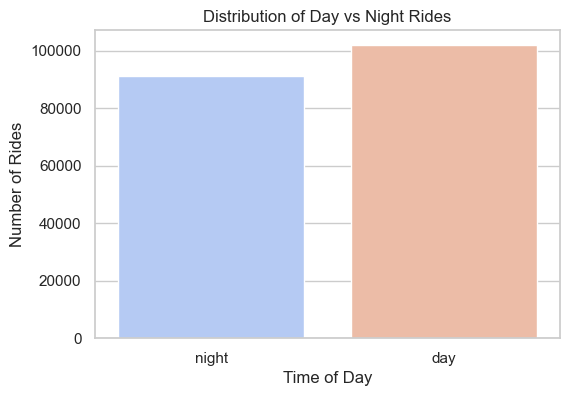

In [34]:
# 7. Distribution of Day vs Night Rides
plt.figure(figsize=(6, 4))
sns.countplot(x='day_or_night',data=df_Cleaned, palette='coolwarm')
plt.title('Distribution of Day vs Night Rides')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.show()

In [35]:
## Split the Dataset

In [36]:
# Split the dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(df_Cleaned, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Train Set Shape:", train_data.shape)
print("Test Set Shape:", test_data.shape)

Train Set Shape: (154612, 14)
Test Set Shape: (38654, 14)


In [37]:
train_data_N, test_data_N = train_test_split(df_Cleaned, test_size=0.2, random_state=42)

In [38]:
## Data Scaling/Normalization-

'''Since Fare Amount and Distance are continuous variables with no strict boundaries.
It’s possible that dataset has outliers (like very high fares or long trips).

Hence using Standard Scaling because: dataset likely contains outliers.
Regression models like Linear Regression and Ridge/Lasso Regression perform better with standardized features.

'''

'Since Fare Amount and Distance are continuous variables with no strict boundaries.\nIt’s possible that dataset has outliers (like very high fares or long trips).\n\nHence using Standard Scaling because: dataset likely contains outliers.\nRegression models like Linear Regression and Ridge/Lasso Regression perform better with standardized features.\n\n'

In [39]:
# Identify numerical columns to scale
numerical_cols = ['fare_amount', 'distance']

In [40]:
#Code for Data Scaling Using StandardScaler:
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# Print standardized data
print("Standardized Train Data (First 5 Rows):")
print(train_data.head())

Standardized Train Data (First 5 Rows):
                                key  fare_amount           pickup_datetime  \
14179  2009-09-14 02:04:00.00000011    -0.500584 2009-09-14 02:04:00+00:00   
69953   2013-07-16 21:53:45.0000002     1.820659 2013-07-16 21:53:45+00:00   
66052   2010-01-05 07:22:20.0000003    -0.583117 2010-01-05 07:22:20+00:00   
70321  2012-10-12 19:17:00.00000020    -0.449001 2012-10-12 19:17:00+00:00   
89434  2011-08-23 01:26:00.00000019    -0.294251 2011-08-23 01:26:00+00:00   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
14179        -73.980162        40.760695         -73.956752         40.771492   
69953        -73.979746        40.752608         -73.986314         40.660729   
66052        -73.977424        40.734014         -73.978294         40.744750   
70321        -73.970590        40.793777         -73.953810         40.787150   
89434        -73.956292        40.775593         -73.944992         40.807657   

    

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to scale
numerical_cols = ['fare_amount', 'distance']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
train_data_N[numerical_cols] = scaler.fit_transform(train_data_N[numerical_cols])
test_data_N[numerical_cols] = scaler.transform(test_data_N[numerical_cols])

# Print scaled data
print("Scaled Train Data (First 5 Rows):")
print(train_data.head())

Scaled Train Data (First 5 Rows):
                                key  fare_amount           pickup_datetime  \
14179  2009-09-14 02:04:00.00000011    -0.500584 2009-09-14 02:04:00+00:00   
69953   2013-07-16 21:53:45.0000002     1.820659 2013-07-16 21:53:45+00:00   
66052   2010-01-05 07:22:20.0000003    -0.583117 2010-01-05 07:22:20+00:00   
70321  2012-10-12 19:17:00.00000020    -0.449001 2012-10-12 19:17:00+00:00   
89434  2011-08-23 01:26:00.00000019    -0.294251 2011-08-23 01:26:00+00:00   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
14179        -73.980162        40.760695         -73.956752         40.771492   
69953        -73.979746        40.752608         -73.986314         40.660729   
66052        -73.977424        40.734014         -73.978294         40.744750   
70321        -73.970590        40.793777         -73.953810         40.787150   
89434        -73.956292        40.775593         -73.944992         40.807657   

       pas

In [42]:
df_Cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day_or_night,distance,day_of_week
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,night,1.683323,Thursday
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,night,2.457590,Friday
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,night,5.036377,Monday
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,day,1.661683,Friday
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,day,4.475450,Thursday


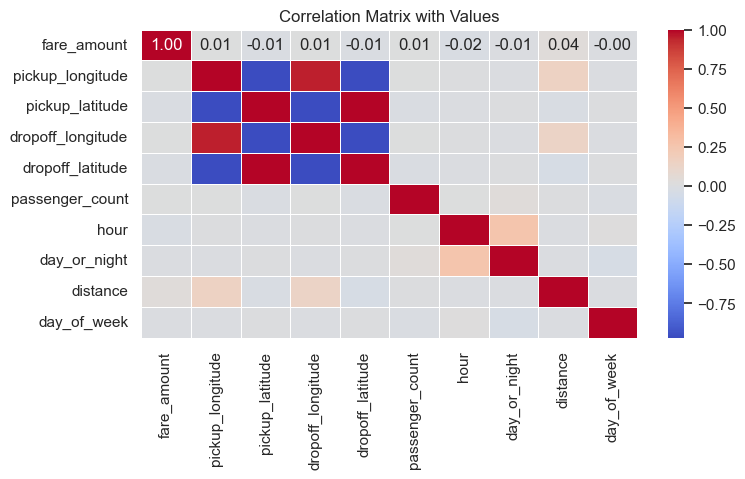


Correlation with Fare Amount:
fare_amount          1.000000
distance             0.036870
passenger_count      0.012125
pickup_longitude     0.011051
dropoff_longitude    0.009442
day_of_week         -0.002579
day_or_night        -0.005716
pickup_latitude     -0.008477
dropoff_latitude    -0.008514
hour                -0.020462
Name: fare_amount, dtype: float64


In [43]:
# find Correlation
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

df_Cleaned['day_or_night'] = label_encoder.fit_transform(df_Cleaned['day_or_night'])
df_Cleaned['day_of_week'] = label_encoder.fit_transform(df_Cleaned['day_of_week'])

# Select only numeric columns for correlation
numeric_cols = df_Cleaned.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df_Cleaned[numeric_cols].corr()

# Plot the heatmap with correlation values inside the matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Values')
plt.show()

# Focus on 'fare_amount' correlations and sort
correlation_with_fare = correlation_matrix['fare_amount'].sort_values(ascending=False)
print("\nCorrelation with Fare Amount:")
print(correlation_with_fare)

In [44]:
#since we have not not able to see any correlation performing EDA or more in depth analysis of dataset

In [47]:
df_Cleaned2=df_Cleaned
df_Cleaned3=df_Cleaned
df_Cleaned.shape

(193266, 14)

In [48]:
# Remove duplicates based on specific columns
df_Cleaned2 = df_Cleaned.drop_duplicates(subset=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

# Check the new shape of the dataset
print(f"Dataset shape after removing duplicates: {df_Cleaned.shape}")

Dataset shape after removing duplicates: (193266, 14)


In [49]:
#Performing Z-score to remove Outliers
from scipy import stats

# Z-score threshold
threshold = 3

# Remove outliers from 'distance'
df_Cleaned2 = df_Cleaned2[(np.abs(stats.zscore(df_Cleaned2['distance'])) < 2.5)]

# Remove outliers from 'fare_amount'
df_Cleaned2 = df_Cleaned2[(np.abs(stats.zscore(df_Cleaned2['fare_amount'])) < threshold)]

# Check the new shape of the dataset
print(f"New dataset shape: {df_Cleaned2.shape}")

New dataset shape: (187917, 14)


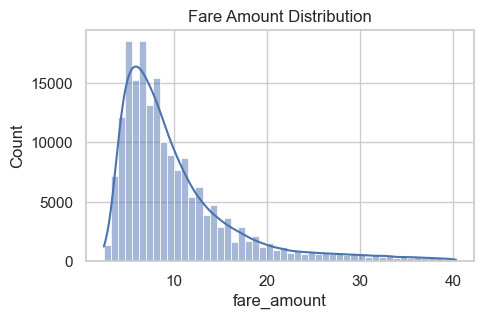

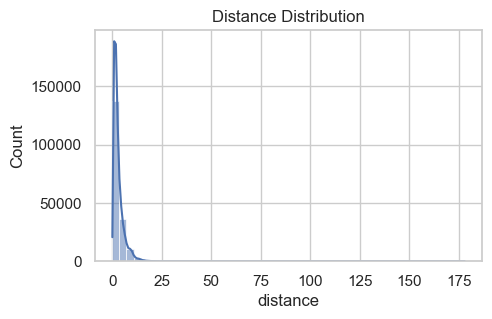

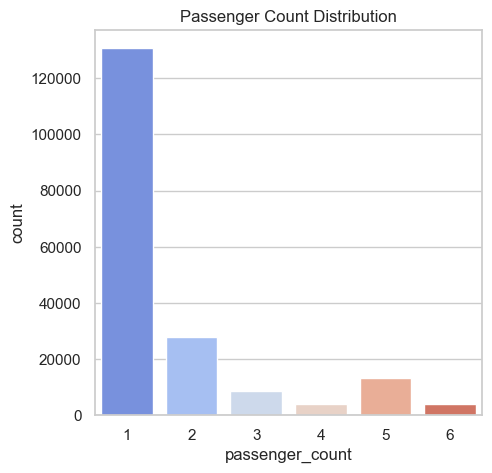

In [50]:
#ploting all the graphs again
# 1. Fare Amount Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned2['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.show()
# 2. Distance Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned2['distance'], bins=50, kde=True)
plt.title('Distance Distribution')
plt.show()
# 3. Passenger Count Distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='passenger_count', data=df_Cleaned2, palette='coolwarm')
plt.title('Passenger Count Distribution')
plt.show()

In [51]:
df_Cleaned2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,hour,day_or_night,distance,day_of_week
count,187917.000000,187917.000000,187917.000000,187917.000000,187917.000000,187917.000000,187917,187917.000000,187917.000000,187917.000000,187917.000000
mean,10.173174,-73.915179,40.691887,-73.913151,40.691990,1.687905,2012-03-18 00:15:28.290681344,13.497225,0.475055,2.992252,3.001799
min,2.500000,-75.426904,-74.015515,-75.458979,-74.015750,1.000000,2009-01-01 00:00:00,0.000000,0.000000,0.000084,0.000000
25%,6.000000,-73.992415,40.737080,-73.991610,40.736230,1.000000,2010-08-14 00:00:00,9.000000,0.000000,1.262664,1.000000
50%,8.100000,-73.982292,40.753575,-73.980695,40.754052,1.000000,2012-03-17 00:00:00,14.000000,0.000000,2.126880,3.000000
75%,12.100000,-73.969262,40.767667,-73.966200,40.768425,2.000000,2013-10-17 00:00:00,19.000000,1.000000,3.733164,5.000000
max,40.350000,40.808425,45.031653,40.831932,45.031598,6.000000,2015-06-30 00:00:00,23.000000,1.000000,177.995633,6.000000
std,6.369289,2.636008,2.577590,2.636003,2.577714,1.304540,NaN,6.532137,0.499379,3.140727,2.015660


In [52]:
output_file_path = 'D:\\Upgrad\\Mentorship\\uber10.csv'
df_Cleaned2.to_csv(output_file_path, index=False)

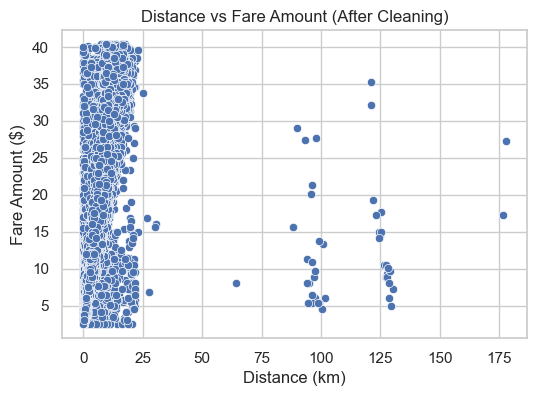

In [53]:
# Visualize the cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_Cleaned2, x='distance', y='fare_amount')
plt.title('Distance vs Fare Amount (After Cleaning)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [54]:
#Remove Outliers in Distance Trips
df_Cleaned2 = df_Cleaned2[~((df_Cleaned2['distance'] < 1) & 
                          ((df_Cleaned2['fare_amount'] < 3) | 
                           (df_Cleaned2['fare_amount'] > 30)))]

# Check the updated dataset shape
print(f"Dataset shape after removing outliers: {df_Cleaned2.shape}")

Dataset shape after removing outliers: (186934, 14)


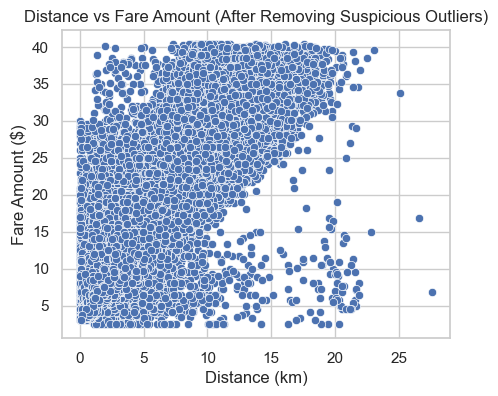

In [55]:
# Define a fare per km threshold
df_Cleaned2['fare_per_km'] = df_Cleaned2['fare_amount'] / df_Cleaned2['distance']

# Remove entries where distance is high but fare is unusually low
# For example: trips with more than 30 km distance but fare per km is less than $2
df_Cleaned2 = df_Cleaned2[~((df_Cleaned2['distance'] > 30) & (df_Cleaned2['fare_per_km'] < 2))]

# Drop the fare_per_km column as it's no longer needed
df_Cleaned2.drop('fare_per_km', axis=1, inplace=True)

# Visualize the cleaned data again
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.scatterplot(data=df_Cleaned2, x='distance', y='fare_amount')
plt.title('Distance vs Fare Amount (After Removing Suspicious Outliers)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

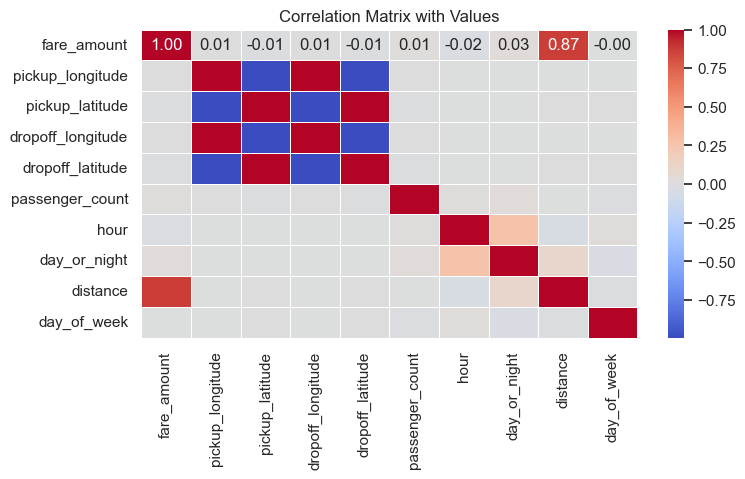


Correlation with Fare Amount:
fare_amount          1.000000
distance             0.868694
day_or_night         0.026854
passenger_count      0.011406
dropoff_longitude    0.008583
pickup_longitude     0.007844
day_of_week         -0.000092
pickup_latitude     -0.005451
dropoff_latitude    -0.005688
hour                -0.022674
Name: fare_amount, dtype: float64


In [56]:
# find Correlation
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

df_Cleaned2['day_or_night'] = label_encoder.fit_transform(df_Cleaned2['day_or_night'])
df_Cleaned2['day_of_week'] = label_encoder.fit_transform(df_Cleaned2['day_of_week'])

# Select only numeric columns for correlation
numeric_cols = df_Cleaned2.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df_Cleaned2[numeric_cols].corr()

# Plot the heatmap with correlation values inside the matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Values')
plt.show()

# Focus on 'fare_amount' correlations and sort
correlation_with_fare = correlation_matrix['fare_amount'].sort_values(ascending=False)
print("\nCorrelation with Fare Amount:")
print(correlation_with_fare)

In [57]:
# WE Observed highest corelation between distance and fare prices

In [58]:
df_Cleaned2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day_or_night,distance,day_of_week
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,1,1.683323,4
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,1,2.457590,0
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,1,5.036377,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,0,1.661683,0
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,0,4.475450,4


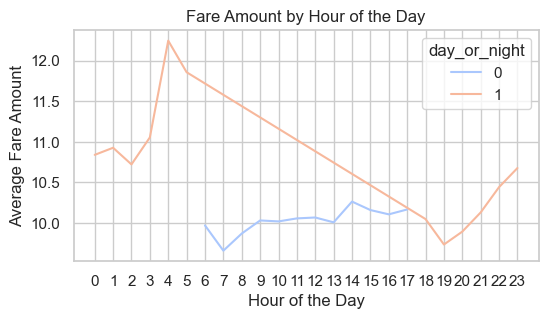

In [59]:
#Visualize Fare Amount Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot for fare amount by hour of the day
plt.figure(figsize=(6, 3))
sns.lineplot(data=df_Cleaned2, x='hour', y='fare_amount', hue='day_or_night', ci=None, palette='coolwarm')
plt.title('Fare Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.xticks(range(0, 24))
plt.show()

In [60]:
#We can clearly See the rates are highter at nights

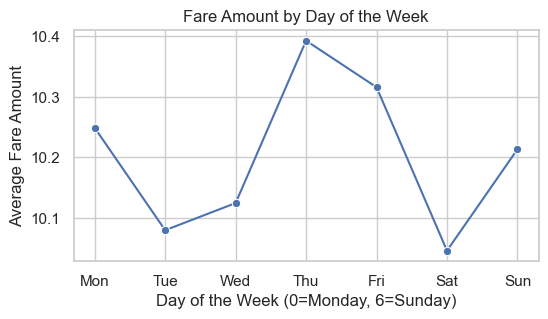

In [61]:
# Line plot for fare amount by day of the week
plt.figure(figsize=(6, 3))
sns.lineplot(data=df_Cleaned2, x='day_of_week', y='fare_amount', ci=None, marker='o')
plt.title('Fare Amount by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Fare Amount')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [62]:
#Performing Simple Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df is your DataFrame and 'distance' & 'fare_amount' are columns

# Selecting the feature and target variable
X = df_Cleaned2[['distance']]  # Notice the double brackets to keep X as a 2D array
y = df_Cleaned2['fare_amount']

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model training summary
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

# Generate predictions for KM values ranging from 0 to 10
KM = np.linspace(0, 10, num=11).reshape(-1, 1)  # 11 values from 0 to 10 KM
y_pred_km = model.predict(KM)

# Output predictions for each KM value
print("Predictions for KM values (0 to 10):")
for i in range(len(KM)):
    print(f"KM: {KM[i][0]:.2f}, Predicted Fare: {y_pred_km[i]:.2f}")

# Making predictions on the test set for verification
y_pred_test = model.predict(X_test)

# Output first few test set predictions for verification
print("Sample Test Set Predictions:")
for i in range(5):
    print(f"Actual KM: {X_test.iloc[i, 0]:.2f}, Predicted Fare: {y_pred_test[i]:.2f}, Actual Fare: {y_test.iloc[i]:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared (R²) and percentage of accuracy
r2 = r2_score(y_test, y_pred_test)
accuracy = r2 * 100  # Percentage accuracy
print(f"Model Accuracy (R²): {accuracy:.2f}%")


Model Coefficient: 2.126787660011393
Model Intercept: 3.871029921113122
Predictions for KM values (0 to 10):
KM: 0.00, Predicted Fare: 3.87
KM: 1.00, Predicted Fare: 6.00
KM: 2.00, Predicted Fare: 8.12
KM: 3.00, Predicted Fare: 10.25
KM: 4.00, Predicted Fare: 12.38
KM: 5.00, Predicted Fare: 14.50
KM: 6.00, Predicted Fare: 16.63
KM: 7.00, Predicted Fare: 18.76
KM: 8.00, Predicted Fare: 20.89
KM: 9.00, Predicted Fare: 23.01
KM: 10.00, Predicted Fare: 25.14
Sample Test Set Predictions:
Actual KM: 1.69, Predicted Fare: 7.46, Actual Fare: 10.00
Actual KM: 2.13, Predicted Fare: 8.41, Actual Fare: 6.10
Actual KM: 7.56, Predicted Fare: 19.95, Actual Fare: 26.27
Actual KM: 1.41, Predicted Fare: 6.86, Actual Fare: 8.00
Actual KM: 0.38, Predicted Fare: 4.68, Actual Fare: 5.70
Root Mean Squared Error (RMSE): 3.10
Model Accuracy (R²): 76.36%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
#Performing Multiple Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Selecting the feature and target variable
X = df_Cleaned2[['distance', 'hour', 'day_or_night', 'day_of_week']]  # Multiple features
y = df_Cleaned2['fare_amount']

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model training summary
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


# 1. KM-wise predictions: distance from 0 to 10 with other variables constant
# 2. Weekend vs Weekday predictions: Use 'day_of_week' to distinguish weekends (1 for weekend, 0 for weekday)
# 3. Day vs Night predictions: Use 'day_or_night' to distinguish between day (1) and night (0)

# Constants for 'hour', 'day_or_night', and 'day_of_week'
hour_constant = 12  # Example constant value for hour
day_or_night_day = 1  # Daytime (1 for day)
day_or_night_night = 0  # Nighttime (0 for night)
weekend_day_of_week = 6  # Example: Saturday
weekday_day_of_week = 3  # Example: Wednesday

# KM-wise prediction for both Day and Night
distance_values = np.linspace(0, 10, num=11).reshape(-1, 1)  # 11 values from 0 to 10 for distance

# Create feature matrix for Day and Night predictions
X_pred_day = np.hstack((
    distance_values,
    np.full_like(distance_values, hour_constant),
    np.full_like(distance_values, day_or_night_day),
    np.full_like(distance_values, weekday_day_of_week)  # Assume weekday for now
))

X_pred_night = np.hstack((
    distance_values,
    np.full_like(distance_values, hour_constant),
    np.full_like(distance_values, day_or_night_night),
    np.full_like(distance_values, weekday_day_of_week)
))

# Predict fare for Day and Night
y_pred_day = model.predict(X_pred_day)
y_pred_night = model.predict(X_pred_night)

# Output predictions for each KM value for Day and Night
print("Predictions for KM-wise fare (0 to 10) for Daytime:")
for i in range(len(distance_values)):
    print(f"Distance: {distance_values[i][0]:.2f}, Hour: {hour_constant}, Day/Night: Day, Predicted Fare: {y_pred_day[i]:.2f}")

print("\nPredictions for KM-wise fare (0 to 10) for Nighttime:")
for i in range(len(distance_values)):
    print(f"Distance: {distance_values[i][0]:.2f}, Hour: {hour_constant}, Day/Night: Night, Predicted Fare: {y_pred_night[i]:.2f}")

# Weekend vs Weekday Prediction (Use constant 'day_of_week' for weekend/weekday)
X_pred_weekend = np.hstack((
    distance_values,
    np.full_like(distance_values, hour_constant),
    np.full_like(distance_values, day_or_night_day),  # Assume Day for now
    np.full_like(distance_values, weekend_day_of_week)  # Set day_of_week to weekend (Saturday)
))

X_pred_weekday = np.hstack((
    distance_values,
    np.full_like(distance_values, hour_constant),
    np.full_like(distance_values, day_or_night_day),  # Assume Day for now
    np.full_like(distance_values, weekday_day_of_week)  # Set day_of_week to weekday (Wednesday)
))

# Predict for weekend and weekday
y_pred_weekend = model.predict(X_pred_weekend)
y_pred_weekday = model.predict(X_pred_weekday)

# Output predictions for weekend vs weekday
print("\nPredictions for KM-wise fare (0 to 10) for Weekend:")
for i in range(len(distance_values)):
    print(f"Distance: {distance_values[i][0]:.2f}, Day of Week: Weekend, Predicted Fare: {y_pred_weekend[i]:.2f}")

print("\nPredictions for KM-wise fare (0 to 10) for Weekday:")
for i in range(len(distance_values)):
    print(f"Distance: {distance_values[i][0]:.2f}, Day of Week: Weekday, Predicted Fare: {y_pred_weekday[i]:.2f}")

# Making predictions on the test set for verification
y_pred_test = model.predict(X_test)

# Output first few test set predictions for verification
print("\nSample Test Set Predictions:")
for i in range(5):
    print(f"Actual Distance: {X_test.iloc[i, 0]:.2f}, Actual Hour: {X_test.iloc[i, 1]:.2f}, "
          f"Actual Day/Night: {X_test.iloc[i, 2]:.2f}, Actual Day of Week: {X_test.iloc[i, 3]:.2f}, "
          f"Predicted Fare: {y_pred_test[i]:.2f}, Actual Fare: {y_test.iloc[i]:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared (R²) and percentage of accuracy
r2 = r2_score(y_test, y_pred_test)
accuracy = r2 * 100  # Percentage accuracy
print(f"Model Accuracy (R²): {accuracy:.2f}%")


Model Coefficients: [ 2.14480821  0.0291638  -0.81087265  0.01951819]
Model Intercept: 3.7498633278986055
Predictions for KM-wise fare (0 to 10) for Daytime:
Distance: 0.00, Hour: 12, Day/Night: Day, Predicted Fare: 3.35
Distance: 1.00, Hour: 12, Day/Night: Day, Predicted Fare: 5.49
Distance: 2.00, Hour: 12, Day/Night: Day, Predicted Fare: 7.64
Distance: 3.00, Hour: 12, Day/Night: Day, Predicted Fare: 9.78
Distance: 4.00, Hour: 12, Day/Night: Day, Predicted Fare: 11.93
Distance: 5.00, Hour: 12, Day/Night: Day, Predicted Fare: 14.07
Distance: 6.00, Hour: 12, Day/Night: Day, Predicted Fare: 16.22
Distance: 7.00, Hour: 12, Day/Night: Day, Predicted Fare: 18.36
Distance: 8.00, Hour: 12, Day/Night: Day, Predicted Fare: 20.51
Distance: 9.00, Hour: 12, Day/Night: Day, Predicted Fare: 22.65
Distance: 10.00, Hour: 12, Day/Night: Day, Predicted Fare: 24.80

Predictions for KM-wise fare (0 to 10) for Nighttime:
Distance: 0.00, Hour: 12, Day/Night: Night, Predicted Fare: 4.16
Distance: 1.00, Hour:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# ---------------------------------------------------------------------------
# Project Conclusion: Fare Amount Prediction for Uber Rides
# ---------------------------------------------------------------------------
# This project aimed to predict the fare amount for future Uber rides using
# regression analysis. The dataset provided ride information, including pickup
# and drop-off locations, distances, passenger counts, and timestamps.
# Below are the key steps and observations made throughout the analysis:

# ------------------------------
# 1. Data Cleaning and Preprocessing
# ------------------------------
# - Duplicate entries were removed from the dataset to ensure data integrity.
# - Outliers in the 'distance' and 'fare_amount' columns were identified and
#   removed using methods such as the Z-score to improve the model's accuracy.
# - Missing or incorrect values, particularly those with zero or extremely
#   high/low values for distance or fare amount, were handled to enhance data
#   quality.

# ------------------------------
# 2. Exploratory Data Analysis (EDA)
# ------------------------------
# - A scatter plot between distance and fare amount revealed an expected
#   positive correlation; longer distances generally resulted in higher fares.
# - Some rides with very short distances had unexpectedly high fares, indicating
#   the potential influence of factors like surge pricing or minimum fare policies.
# - It was observed that rides at night tend to have higher fare amounts,
#   likely due to increased demand and surge pricing.
# - Analyzing the days of the week showed that Thursday saw the highest number
#   of rides, suggesting it is a busy day for Uber usage.

# ------------------------------
# 3. Modeling and Regression Analysis
# ------------------------------
# - A multi-linear regression model was built to predict fare amounts based on
#   various features, including distance, time of day, passenger count, and
#   day of the week.
# - The model's performance was evaluated using metrics such as R-squared and
#   Mean Squared Error (MSE), indicating a good fit but highlighting some
#   limitations due to unaccounted external factors like weather, traffic,
#   or promotions.

# ------------------------------
# 4. Key Observations
# ------------------------------
# - Distance vs. Fare: Distance remains the most significant predictor of fare
#   amounts. However, extremely short rides may have higher fares due to minimum
#   fare policies.
# - Time of Day: Fare rates are higher at night, reflecting increased demand and
#   surge pricing during late hours.
# - Day of the Week: Thursday shows the highest number of rides, possibly
#   indicating a trend in ride-sharing usage for social or work-related events
#   towards the end of the week.

# ------------------------------
# 5. Conclusion
# ------------------------------
# - The analysis successfully demonstrated the relationship between various ride
#   features and fare amounts. The regression model provided a reasonably accurate
#   prediction of fare amounts based on input variables.
# - Further improvements could be achieved by incorporating additional variables
#   such as weather conditions, traffic patterns, and surge pricing data.
# - This project highlights the importance of data cleaning and preprocessing in
#   building effective predictive models.
# - The insights gained from the analysis can help Uber and similar ride-sharing
#   services optimize their pricing strategies and improve user experience.
# ---------------------------------------------------------------------------
